In [ ]:
import warnings
warnings.simplefilter(action = 'ignore')
warnings.filterwarnings('ignore')
#unneccery warnings like it will depriciate in future , etc just to make code neat and clean


In [ ]:
from collections import Counter

In [ ]:
#import necessary packages
import numpy as np   #numpy mathematical library
import pandas as pd  # pandas to deal with data frame

In [ ]:
#data Visualiazation used for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#algorithms
from statsmodels.stats.outliers_influence import variance_inflation_factor   # we find outlier from this
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler        #will make in range from -1 to 1  # sbko ek equal weightage miljaye.
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Maternal Health Risk Data Set.csv to Maternal Health Risk Data Set.csv


In [ ]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
print(f"The dataset size: {df.shape}")

The dataset size: (1014, 7)


In [ ]:
print(df["RiskLevel"].value_counts())

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


In [ ]:
df.tail()  #give last 5 records if you give any num in between paranthesis then it will give you that much last records.

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [ ]:
df.describe().T # basically T is a transpose tells the count mean std min max

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [ ]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

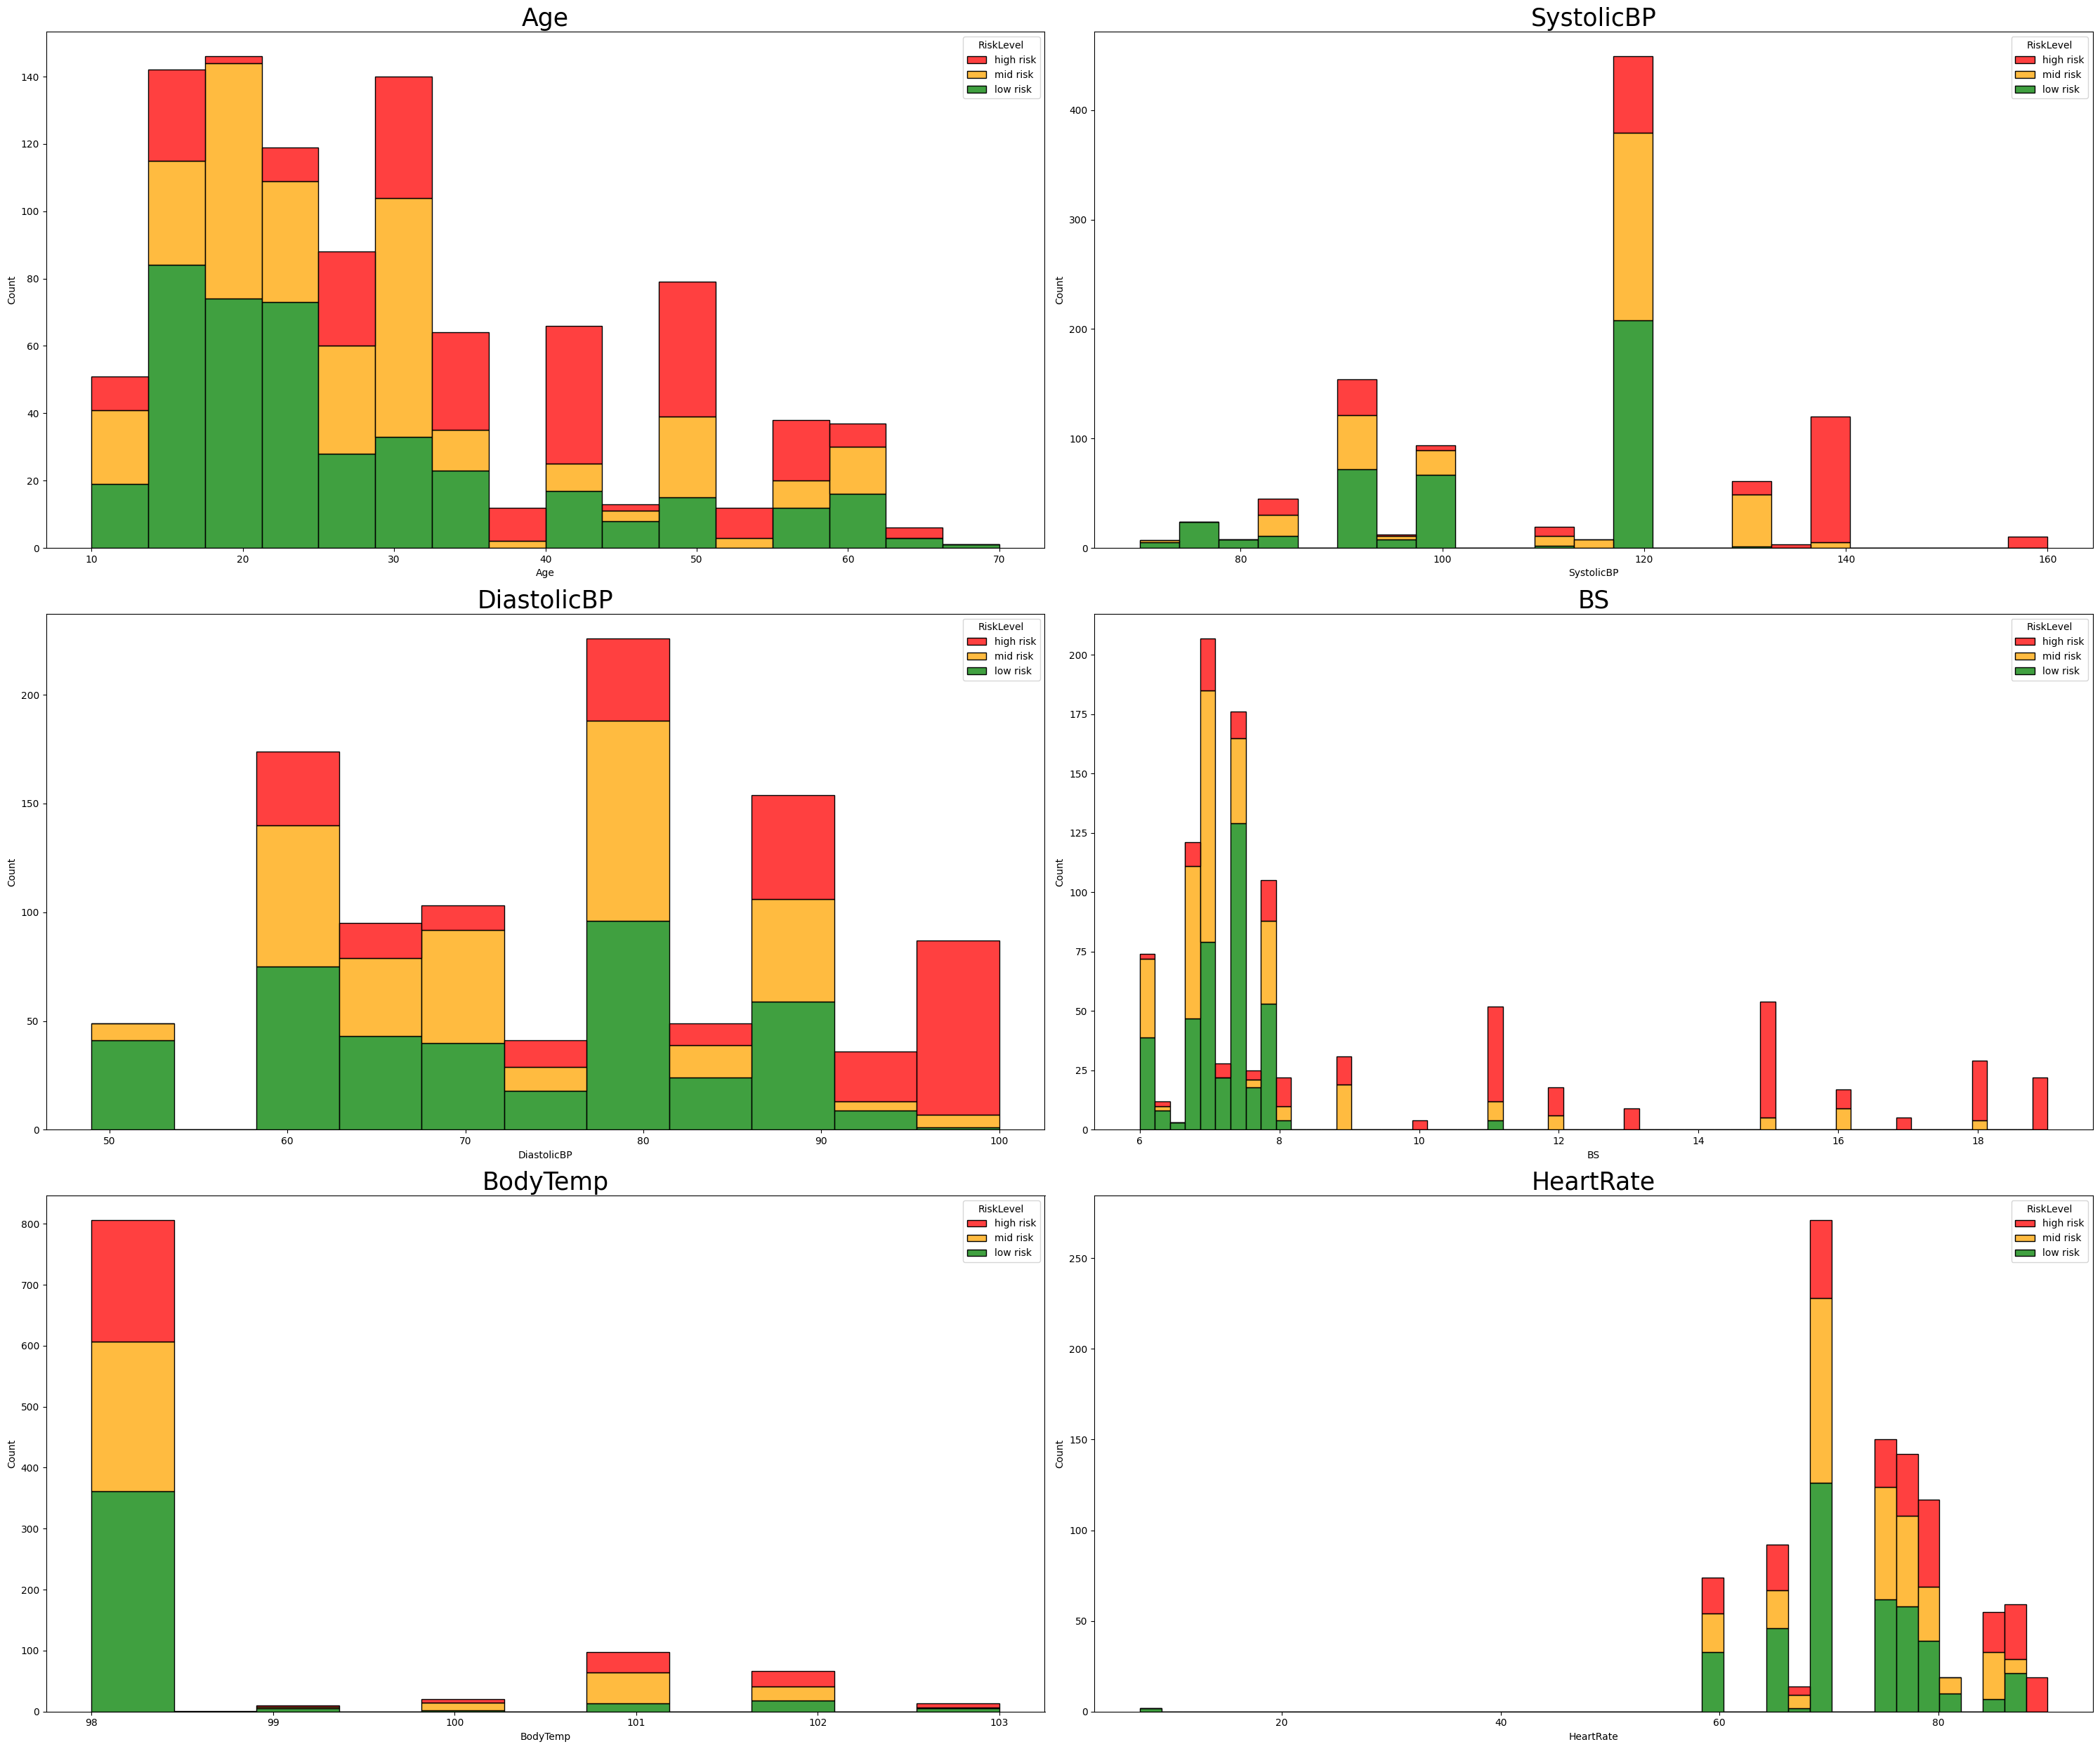

In [ ]:
#plot stacked histograms for the feature variables
fig, axes = plt.subplots(nrows = 3, ncols=2, figsize = (30,25))
risk_level_order = ["high risk", "mid risk", "low risk"]

for ax, column in zip(axes.flatten(), df.columns):  # zip means asking several iterable data structures, like lists or arrays, and bringing them together in a way that you can work with seamlessly.
  sns.histplot(data = df,
               x = column,
               hue = "RiskLevel",
               hue_order = risk_level_order,
               multiple = "stack",
               palette={"low risk" : "green", "mid risk" : "orange", "high risk" : "red"},
               element = "bars",
               ax = ax)
  ax.set_title(f"{column}", fontsize = 25)
plt.tight_layout()
plt.savefig("maternal_features_description.png")
plt.show()

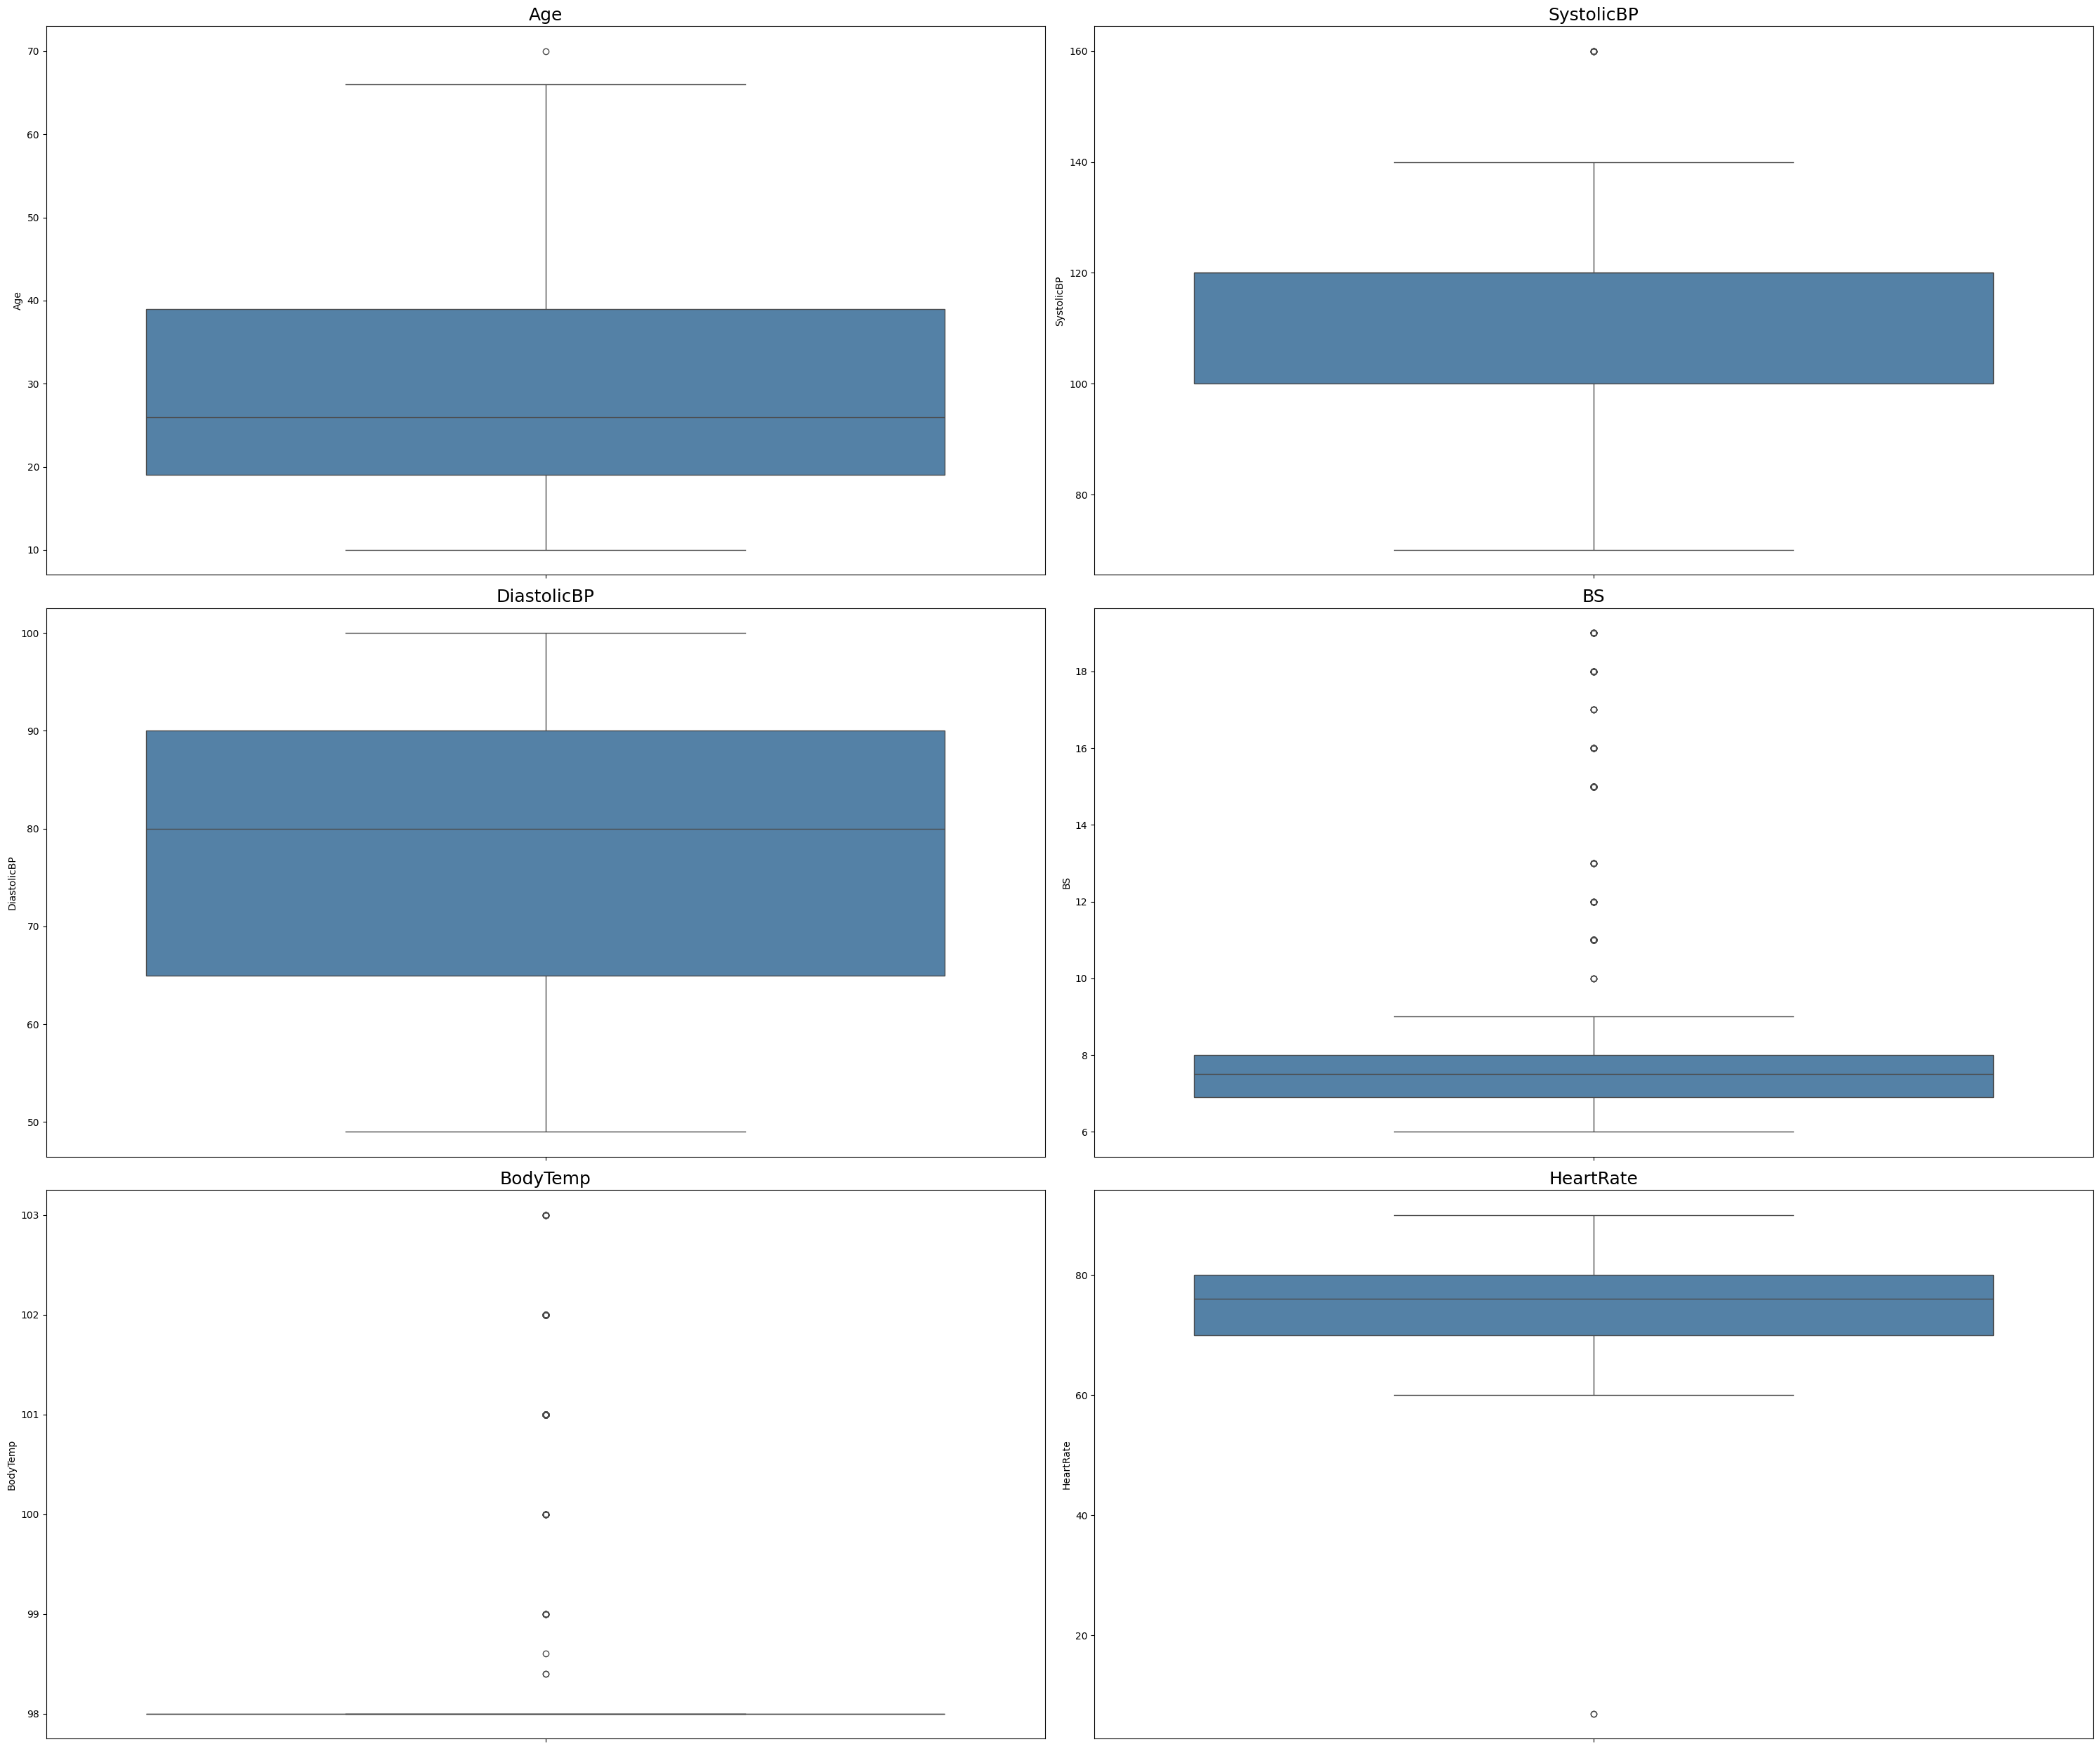

In [ ]:
#plots boxplots for the feature variables
fig, axes = plt.subplots(nrows = 3, ncols=2, figsize = (30,25))

for ax, column in zip(axes.flatten(), df.columns):
  sns.boxplot(y = df[column],
              color = "#4682B4",
              ax = ax)
  ax.set_title(f"{column}", fontsize = 18)

plt.tight_layout()
plt.savefig("maternal_skewed_distribution_to_check_outliars.png")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Maternal Health Risk Data Set.csv to Maternal Health Risk Data Set (1).csv


##Correlation Analysis of Variables

In [ ]:
df2 = pd.read_csv("Maternal Health Risk Data Set.csv")
print(df2.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [ ]:
# Map Risk Level to integer values
# how much one term is dependent on another term
risk_mapping = {"low risk": 0, "mid risk": 1, "high risk": 2}  # created one dictonary and mapped with
df2["RiskLevel"] = df2["RiskLevel"].map(risk_mapping)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


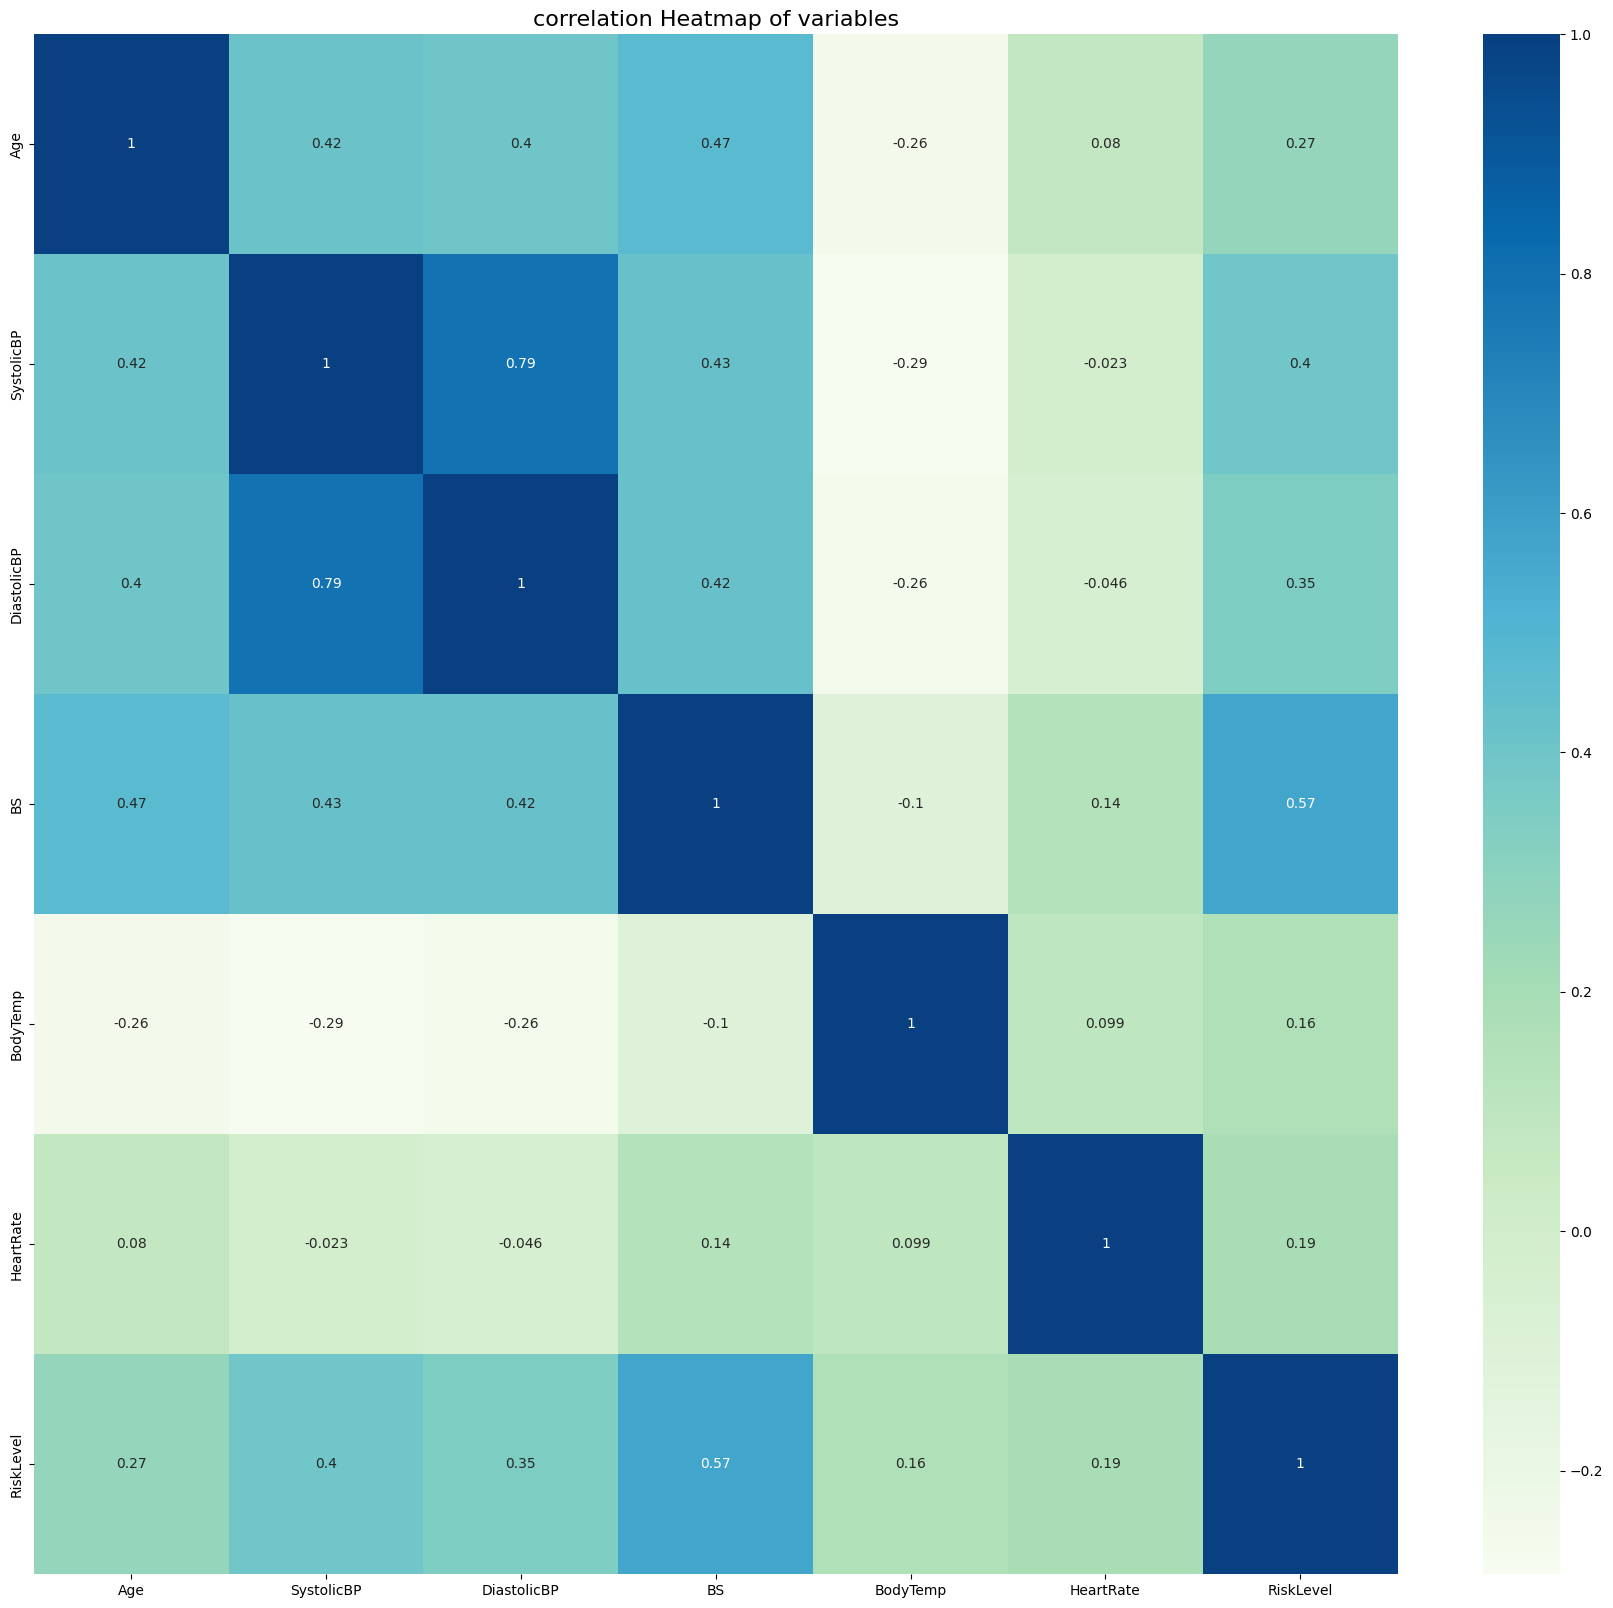

In [ ]:
# create a correlation heatmap
#correalation is like production less demand high
plt.figure(figsize=(22,20))
sns.heatmap(df2.corr(), annot=True, cmap="GnBu") #annot in how much percent it is related, cmap means a color
plt.title("correlation Heatmap of variables", fontsize = 16)
plt.savefig("maternal_heatmap_to_check_correlation.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

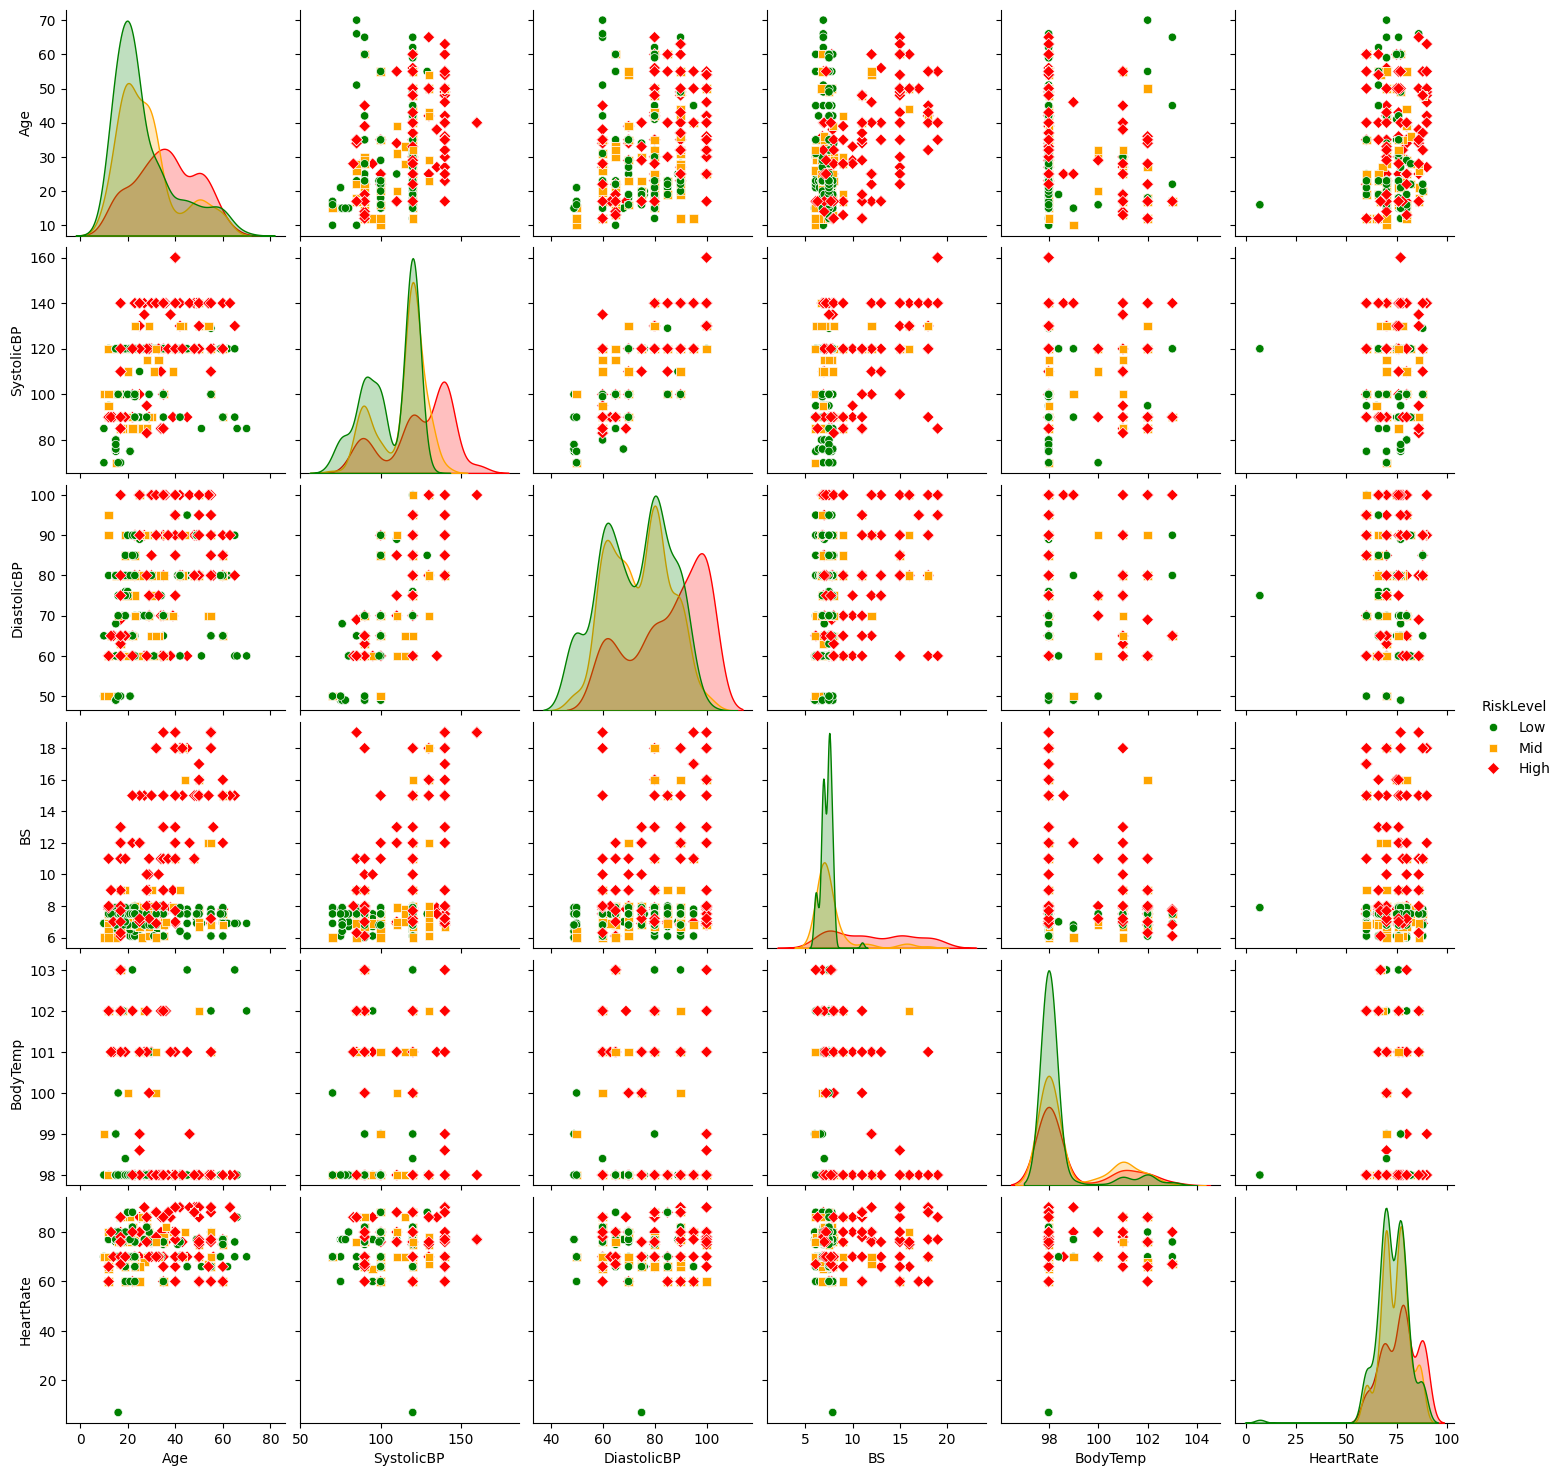

In [ ]:
#create a pariplot with risklevel
risk_colors = {0: "green", 1: "orange", 2:"red"}
plot = sns.pairplot(df2, hue = "RiskLevel", palette = risk_colors, markers=["o","s","D"])
legend_labels = {"0": "Low", "1": "Mid", "2": "High"}
for text, label in zip(plot._legend.texts, legend_labels.values()):
  text.set_text(label)
plt.savefig("maternal_pairplot_to_see_correlation.png")
plt.show


In [ ]:
#dealing with multicollinearty
#variance inflation factor(VIF) Calculation
X = df2[["SystolicBP", "DiastolicBP"]]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      Variable       VIF
0   SystolicBP  79.96833
1  DiastolicBP  79.96833


In [ ]:
#drop systolicBP for model training
df2 = df2.drop(["SystolicBP"], axis = 1)

In [ ]:
#identify the oulier in heartrate
#An outlier is a data point that is noticeably different from the rest.
#They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.
df2.HeartRate.sort_values().head()

,HeartRate
499,7
908,7
1000,60
1010,60
705,60


In [ ]:
#remove the outlier in heart Rate
df2 = df2.drop(df2.index[df2.HeartRate ==7])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1012 non-null   int64  
 1   DiastolicBP  1012 non-null   int64  
 2   BS           1012 non-null   float64
 3   BodyTemp     1012 non-null   float64
 4   HeartRate    1012 non-null   int64  
 5   RiskLevel    1012 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 55.3 KB


In [ ]:
print(df2["RiskLevel"].value_counts())


RiskLevel
0    404
1    336
2    272
Name: count, dtype: int64


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


#  

*   above code we have done data preprocessing and data visualization
*   now from this onwards we will create one model


##Model Building


#

*   jiske basis pe predict krna hai wo
    feature hai aur jo predict krna hai wo label hota hai
*   all column names are feature and risklevel column is label bcz we are going to predict a risk level.




In [ ]:
#feature scaling
columns = ["Age", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]
scale_X = StandardScaler()
X = pd.DataFrame(scale_X.fit_transform(df2.drop(["RiskLevel"], axis = 1),), columns = columns)  # x is feature which we will give input
Y = df2["RiskLevel"] # y is a label which we will predict


In [ ]:
X.head()

,Age,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.363796,0.254566,1.903633,-0.485808,1.538308
1,0.378765,0.974379,1.296644,-0.485808,-0.589878
2,-0.066772,-0.465247,-0.220828,0.972192,0.740239
3,0.007484,0.614473,-0.524323,-0.485808,-0.589878
4,0.378765,-1.185059,-0.797468,-0.485808,0.208192


In [ ]:
# training set  : we give questions and answers to machine and tell this are que ans now get train on the basis of it
#Train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)  #0.2 means 20% test size pe challe, random means random ly shuffle kre , stratify It ensures that the proportion of each class in the target variable (Y) is the same in both the training and testing sets.
#What stratify=Y does:
#Suppose Y has:
#60% "low risk"
#30% "mid risk"
#10% "high risk"
#Then after train_test_split(..., stratify=Y), both training and test sets will have the same 60-30-10 ratio.
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((809, 5), (203, 5), (809,), (203,))

In [ ]:
X_train.head()

,Age,DiastolicBP,BS,BodyTemp,HeartRate
266,-0.141028,-1.185059,-0.554672,-0.485808,1.006262
744,0.081740,-1.185059,-0.797468,-0.485808,0.208192
554,1.492607,1.694192,2.207127,-0.485808,0.075180
869,0.081740,-1.185059,-0.797468,-0.485808,0.208192
198,-0.066772,-0.465247,-0.797468,-0.485808,0.474215


##logistic Regression
first need to classifiaction problem he ya regression problem

--regression means predicting with numericals like if we to predict what will be the price of house after 5 years.
regression ke liye linear regression use krte.

-- in classification we are guessing probability that 75% it would be or not.
eg: cat and dog 0 is for cat and 1 for dog we can guess probability of it
we will hit maximum threshold and predict it
-logistic regression comes under classification


In [ ]:
#baseline model of logistic regression
logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, Y_train)
print(f"Baseline logistic Regression: {round(logistic_regression_mod.score(X_test, Y_test),3)}")
pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline logistic Regression: 0.64


In [ ]:
#cross Validate Logistic regression model
scores_Logistic = cross_val_score(logistic_regression, X_train, Y_train, cv=3, scoring='accuracy')
print(f"Scores(cross Validate) for logistic regression model:\n{scores_Logistic}")
print(f"CrossValMean: {round(scores_Logistic.mean(),3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")


Scores(cross Validate) for logistic regression model:
[0.6037037  0.5962963  0.57992565]
CrossValMean: 0.593
CrossValStandard Deviation: 0.01


In [ ]:
# we r making one dictonary in that we can say tol can have 0.0001,0.0002,0.0003 vany one of the value
params_LR ={"tol" : [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1,2,3,4],
            "solver": ["liblinear", "lbfgs", "newton-cg"],
            "max_iter": [100, 200, 300],
            }

In [ ]:
#gridsearch will take one module
GridSearchCV_LR = GridSearchCV(estimator= linear_model.LogisticRegression(),
                               param_grid=params_LR,
                               cv=3,
                               scoring='accuracy',    # iske based pe decide honga konsa parameter sahi hai
                               return_train_score=True)


In [ ]:
GridSearchCV_LR.fit(X_train, Y_train);   # ek ek parameter dal ke dekhega aur batayega  which is best


In [ ]:
print(f"Best Estimator for LR model:\n{GridSearchCV_LR.best_estimator_}")
print(f"Best Parameter values for LR model:\n{GridSearchCV_LR.best_params_}")
print(f"Best Score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best Estimator for LR model:
LogisticRegression(C=0.01, solver='liblinear')
Best Parameter values for LR model:
{'C': 0.01, 'intercept_scaling': 1, 'max_iter': 100, 'solver': 'liblinear', 'tol': 0.0001}
Best Score for LR model: 0.602


In [ ]:
 #Test with new parameter
#logistic_regression:- we have set model name,then we initialis=ze logistic regression from linear model,max_iter means how much time will loop get run then by which method will it get solve that is liblinear, tol = rate of learning , random state means andar jake shuffle honga
logistic_regression = linear_model.LogisticRegression(C=0.01, intercept_scaling=1, max_iter = 100, solver = "liblinear", tol=0.0001, random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, Y_train)# fit means train krne ke liye de diya on x train and y train
pred_logistic_regression = logistic_regression_mod.predict(X_test)# removed prediction on x test , y_test  is the original value jo x test ke respective me ani chahiye, unn dono ko compare krke unka mean square error kya arra.

mse_logistic_regression = mean_squared_error(Y_test, pred_logistic_regression)   #mean square error
rmse_logistic_regression = np.sqrt(mean_squared_error(Y_test, pred_logistic_regression))   #root mean square error
score_logistic_regression_train = logistic_regression_mod.score(X_train, Y_train)  # we can find score from logistic regression score
score_logistic_regression_test = logistic_regression_mod.score(X_test, Y_test)

In [ ]:
print(f"Mean Square error for logistic regression = {round(mse_logistic_regression,3)}")
print(f"Root Mean Square error for logistic regression = {round(rmse_logistic_regression,3)}")
print(f"R^2(coefficient of determination)on training set = {round(score_logistic_regression_train,3)}")
print(f"R^2(coefficient of determination)on testing set = {round(score_logistic_regression_test,3)}")

Mean Square error for logistic regression = 0.512
Root Mean Square error for logistic regression = 0.716
R^2(coefficient of determination)on training set = 0.609
R^2(coefficient of determination)on testing set = 0.635


In [ ]:
#classification report : har model ko analysis krne ke liye 3-4 matrix hote hai so accuracy main hoti hai uske sath sath precision    recall  f1-score   support ye bhi main hote hai.
print("Classification Report")
print(classification_report(Y_test, pred_logistic_regression))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.88      0.70        81
           1       0.56      0.21      0.30        67
           2       0.77      0.80      0.79        55

    accuracy                           0.64       203
   macro avg       0.64      0.63      0.60       203
weighted avg       0.63      0.64      0.59       203

Confusion Matrix:
[[71  6  4]
 [44 14  9]
 [ 6  5 44]]


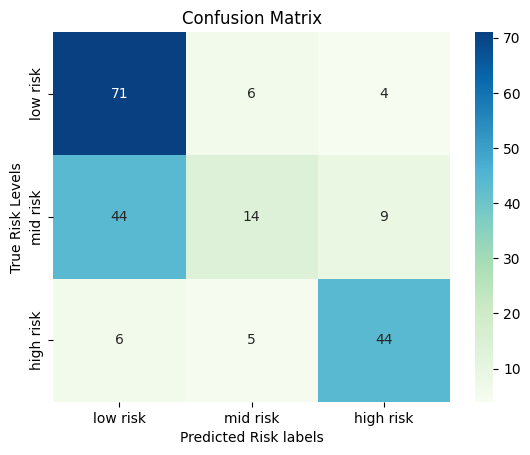

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(Y_test, pred_logistic_regression), annot = True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Risk labels");
ax.set_ylabel("True Risk Levels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["low risk", "mid risk", "high risk"]);
ax.yaxis.set_ticklabels(["low risk", "mid risk", "high risk"]);

In [ ]:
#Baseline model of k-Nearest Neighbours
#what does it do wo apne pass wale 5, 6 ,7 bandho ko dekhta hai aur jo fat run hota hai uske class me chale jata hai
knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, Y_train)
print(f"Baseline K-Nearest Neighbour: {round(knn_mod.score(X_test, Y_test),3)}")
pred_knn = knn_mod.predict(X_test)

Baseline K-Nearest Neighbour: 0.665


In [ ]:
#cross validate k-Nearest model
scores_knn = cross_val_score(knn, X_train, Y_train, cv=3, scoring='accuracy')
print(f"scores(cross validate) for KNN model:\n{scores_knn}")
print(f"CrossValMean: {round(scores_knn.mean(),3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")

scores(cross validate) for KNN model:
[0.61481481 0.68148148 0.62453532]
CrossValMean: 0.64
CrossValStandard Deviation: 0.029


In [ ]:
params_knn = {"leaf_size": list(range(1,30)),
             "n_neighbors": list(range(1,21)),
             "p": [1,2],
             "weights": ["uniform", "distance"]
             }

In [ ]:
GridSearchCV_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),     # Your model (KNN)
    param_grid=params_knn,                # Dictionary of parameters to search
    cv=3,                                 # 3-fold cross-validation
    scoring="accuracy",                   # Use accuracy to evaluate performance
    return_train_score=True               # Also store training scores
)


In [ ]:
#fit model with train data
GridSearchCV_knn.fit(X_train, Y_train);

In [ ]:
print(f"Best Estimator for KNN model:\n{GridSearchCV_knn.best_estimator_}")
print(f"Best Parameter values for KNN model:\n{GridSearchCV_knn.best_params_}")
print(f"Best Score for GNB model: {round(GridSearchCV_knn.best_score_, 3)}")


Best Estimator for KNN model:
KNeighborsClassifier(leaf_size=1, n_neighbors=10, weights='distance')
Best Parameter values for KNN model:
{'leaf_size': 1, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Best Score for GNB model: 0.795


In [ ]:
# Test with new Parameter
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=10, p=2, weights="distance")
knn_mod = knn.fit(X_train, Y_train)
pred_knn = knn_mod.predict(X_test)

mse_knn = mean_squared_error(Y_test, pred_knn)
rmse_knn = np.sqrt(mean_squared_error(Y_test, pred_knn))
score_knn_train = knn_mod.score(X_train, Y_train)
score_knn_test = knn_mod.score(X_test, Y_test)

In [ ]:
print(f"Mean Square error for KNN = {round(mse_knn,3)}")
print(f"Root Mean Square error for KNN = {round(rmse_knn,3)}")
print(f"R^2(coefficient of determination)on training set = {round(score_knn_train,3)}")
print(f"R^2(coefficient of determination)on testing set = {round(score_knn_test,3)}")

Mean Square error for KNN = 0.251
Root Mean Square error for KNN = 0.501
R^2(coefficient of determination)on training set = 0.934
R^2(coefficient of determination)on testing set = 0.837


In [ ]:
print("Classification Report")
print(classification_report(Y_test, pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        81
           1       0.77      0.85      0.81        67
           2       0.88      0.93      0.90        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
[[62 17  2]
 [ 5 57  5]
 [ 4  0 51]]


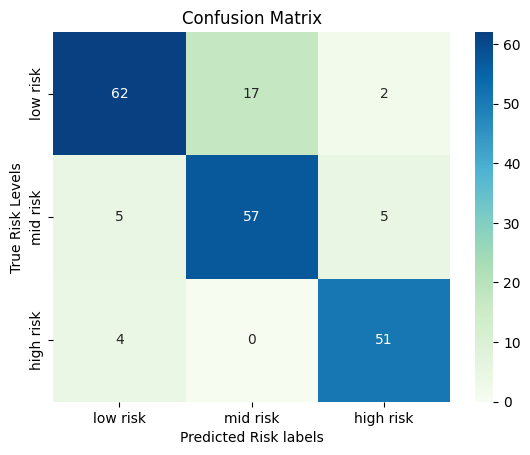

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(Y_test, pred_knn), annot = True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Risk labels");
ax.set_ylabel("True Risk Levels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["low risk", "mid risk", "high risk"]);
ax.yaxis.set_ticklabels(["low risk", "mid risk", "high risk"]);

##Random Forest

In [ ]:
#baseline model of random forest classifier
random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, Y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, Y_test),3)}")
pred_random_forest = random_forest_mod.predict(X_test)

Baseline Random Forest: 0.837


In [ ]:
#cross validate Random Forest Classifier
scores_RF = cross_val_score(random_forest, X_train, Y_train, cv=3, scoring='accuracy')
print(f"scores(cross validate) for RF model:\n{scores_RF}")
print(f"CrossValMean: {round(scores_RF.mean(),3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

scores(cross validate) for RF model:
[0.8037037  0.8037037  0.82899628]
CrossValMean: 0.812
CrossValStandard Deviation: 0.012


In [ ]:
params_RF = {"min_samples_split": [2, 6, 20],
             'min_samples_leaf': [1, 2, 4],
             "n_estimators": [50, 100, 200, 300, 400],
             "max_depth": [None, 10, 20, 30],
             "criterion": ["gini","entropy"]
            }

In [ ]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                               param_grid=params_RF,
                               cv=3,
                               scoring='accuracy',
                               return_train_score=True
                               )

In [ ]:
GridSearchCV_RF.fit(X_train, Y_train);

In [ ]:
print(f"Best estimator for RF model:\n{GridSearchCV_RF.best_estimator_}")
print(f"Best parameter values for RF model:\n{GridSearchCV_RF.best_params_}")
print(f"Best Score for RF model: {round(GridSearchCV_RF.best_score_, 3)}")

Best estimator for RF model:
RandomForestClassifier(max_depth=30)
Best parameter values for RF model:
{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for RF model: 0.821


In [ ]:
#test with new parameter
random_forest = RandomForestClassifier(criterion="entropy", max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
random_forest_mod = random_forest.fit(X_train, Y_train)
pred_random_forest = random_forest_mod.predict(X_test)

mse_random_forest = mean_squared_error(Y_test, pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(Y_test, pred_random_forest))
score_random_forest_train = random_forest_mod.score(X_train, Y_train)
score_random_forest_test = random_forest_mod.score(X_test, Y_test)

In [ ]:
print(f"mean square error for Random Forest  = {round(mse_random_forest,3)}")
print(f"root mean square error for Random Forest  = {round(rmse_random_forest,3)}")
print(f"R^2(coefficient of determination)on training set = {round(score_random_forest_train,3)}")
print(f"R^2(coefficient of determination)on testing set = {round(score_random_forest_test,3)}")

mean square error for Random Forest  = 0.236
root mean square error for Random Forest  = 0.486
R^2(coefficient of determination)on training set = 0.934
R^2(coefficient of determination)on testing set = 0.837


In [ ]:
print("Classification Report")
print(classification_report(Y_test, pred_random_forest))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        81
           1       0.78      0.81      0.79        67
           2       0.87      0.96      0.91        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
[[63 15  3]
 [ 8 54  5]
 [ 2  0 53]]


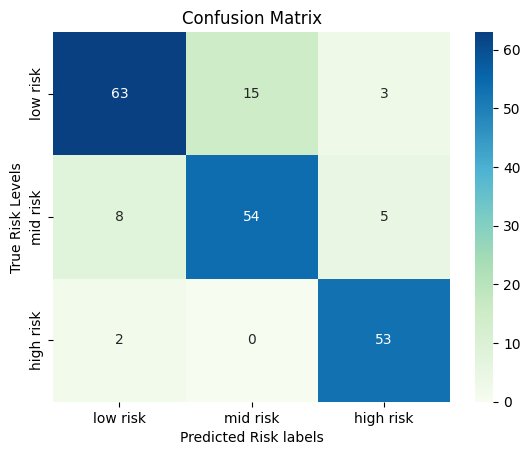

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(Y_test, pred_random_forest), annot = True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Risk labels");
ax.set_ylabel("True Risk Levels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["low risk", "mid risk", "high risk"]);
ax.yaxis.set_ticklabels(["low risk", "mid risk", "high risk"]);

## Gradient Boosting Classifier


In [ ]:
#baseline model of gradient boosting classifier
gbc =  GradientBoostingClassifier()
gbc_mod = gbc.fit(X_train, Y_train)
print(f"Baseline Gradient Boosting Classifier: {round(gbc_mod.score(X_test, Y_test),3)}")
pred_gbc = gbc_mod.predict(X_test)

Baseline Gradient Boosting Classifier: 0.783


In [ ]:
#cross validate gradient boosting classifier model
scores_GBC = cross_val_score(gbc, X_train, Y_train, cv=3, scoring='accuracy')
print(f"scores(cross validate) for GBC model:\n{scores_GBC}")
print(f"CrossValstandard Deviation: {round(scores_GBC.std(),3)}")

scores(cross validate) for GBC model:
[0.74814815 0.78518519 0.80297398]
CrossValstandard Deviation: 0.023


In [ ]:
#"loss": ["deviance", "exponential"],

params_GBC = {
    "loss": ["log_loss"],  # ✅ valid and recommended for multiclass
    "learning_rate": [0.01, 0.05, 0.075, 0.1],
    "n_estimators": [100, 250, 500],
    "max_depth": [3, 5, 8, 10],
    "subsample": [0.8, 1]
}

In [ ]:
GridSearchCV_GBC = GridSearchCV(estimator=GradientBoostingClassifier(),
                                param_grid = params_GBC,
                                cv=3,
                                scoring='accuracy',
                                return_train_score=True)


In [ ]:
#fit model with train data
GridSearchCV_GBC.fit(X_train, Y_train);

In [ ]:
print(f"best Estimator for GBC model:\n{GridSearchCV_GBC.best_estimator_}")
print(f"Best Parameter values for GBC model:\n{GridSearchCV_GBC.best_params_}")
print(f"Best Score for GBC model: {round(GridSearchCV_GBC.best_score_, 3)}")

best Estimator for GBC model:
GradientBoostingClassifier(learning_rate=0.075, max_depth=10, n_estimators=500,
                           subsample=1)
Best Parameter values for GBC model:
{'learning_rate': 0.075, 'loss': 'log_loss', 'max_depth': 10, 'n_estimators': 500, 'subsample': 1}
Best Score for GBC model: 0.826


In [ ]:
#test with new parameter
gbc = GradientBoostingClassifier(loss="log_loss", learning_rate=0.5, n_estimators=100, max_depth=10, subsample=1, random_state = 4)
gbc_mod = gbc.fit(X_train, Y_train)
pred_gbc = gbc_mod.predict(X_test)

mse_gbc = mean_squared_error(Y_test, pred_gbc)
rmse_gbc = np.sqrt(mean_squared_error(Y_test, pred_gbc))
score_gbc_train = gbc_mod.score(X_train, Y_train)
score_gbc_test = gbc_mod.score(X_test, Y_test)

In [ ]:
print(f"mean square error for GBC  = {round(mse_gbc,3)}")
print(f"root mean square error for GBC  = {round(rmse_gbc,3)}")
print(f"R^2(coefficient of determination)on training set = {round(score_gbc_train,3)}")
print(f"R^2(coefficient of determination)on testing set = {round(score_gbc_test,3)}")

mean square error for GBC  = 0.236
root mean square error for GBC  = 0.486
R^2(coefficient of determination)on training set = 0.934
R^2(coefficient of determination)on testing set = 0.837


In [ ]:
print("Classification Report")
print(classification_report(Y_test, pred_gbc))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        81
           1       0.79      0.79      0.79        67
           2       0.87      0.96      0.91        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
[[64 14  3]
 [ 9 53  5]
 [ 2  0 53]]


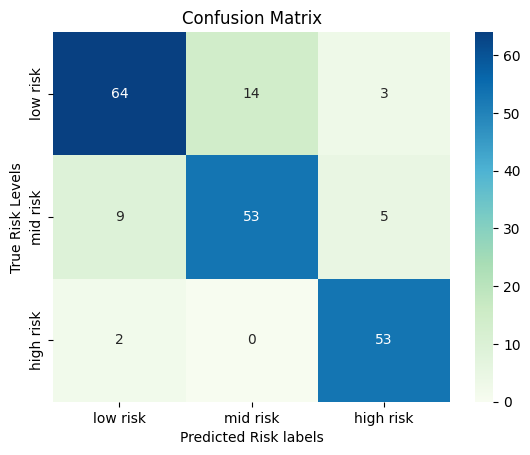

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(Y_test, pred_gbc), annot = True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Risk labels");
ax.set_ylabel("True Risk Levels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["low risk", "mid risk", "high risk"]);
ax.yaxis.set_ticklabels(["low risk", "mid risk", "high risk"]);


In [ ]:
#create a Dataframe to store model evaluation results
results = pd.DataFrame({
    "Model" : ["Logistic Regression", "K-Nearest Neighbours","Random Forest", "Gradient Boosting Classifier"],
    "Train Score" : [
        #calculate mean cross-validation accuracy for training set
        cross_val_score(logistic_regression_mod, X_train, Y_train, cv=3).mean(),
        cross_val_score(knn_mod, X_train, Y_train, cv=3).mean(),
        cross_val_score(random_forest_mod, X_train, Y_train, cv=3).mean(),
        cross_val_score(gbc_mod, X_train, Y_train, cv=3).mean()

    ],
    "Test Score" : [
        #calculate accuracy on the test set
        logistic_regression_mod.score(X_test, Y_test),
        knn_mod.score(X_test, Y_test),
        random_forest_mod.score(X_test, Y_test),
        gbc_mod.score(X_test, Y_test)
    ]
})
# Additional Matrics(Precision, recall, F1 score)
metrics = ["precision", "recall", "f1"]
for metric in metrics:
    results[f"{metric.capitalize()}"] = [
        precision_recall_fscore_support(Y_test, model.predict(X_test), average = "weighted") [metrics.index(metric)]
        for model in [logistic_regression_mod, knn_mod, random_forest_mod, gbc_mod]
    ]
result_df = results.sort_values(by="Test Score", ascending = False)
result_df = result_df.set_index("Test Score")
result_df

,Model,Train Score,Precision,Recall,F1
Test Score,,,,,
0.837438,K-Nearest Neighbours,0.794818,0.840899,0.837438,0.836922
0.837438,Random Forest,0.815834,0.838058,0.837438,0.836144
0.837438,Gradient Boosting Classifier,0.819542,0.836980,0.837438,0.836060
0.635468,Logistic Regression,0.601960,0.628104,0.635468,0.593824


In the evaluation of model performance, the Gradient Boosting Classifier emerges as the standout performer among the considered models. With a test accuracy of 84.23%, it surpasses both the K-Nearest Neighbors and Random Forest models, which exhibit commendable test accuracies of 83.74% each. Notably, the Gradient Boosting Classifier's test score outstrips its train score, indicating robust generalization and mitigating concerns of overfitting. Moreover, this model demonstrates superior precision, recall, and F1 score, reflecting a well-balanced performance across various evaluation metrics. The KNN model closely follows, excelling in precision and recall, while the Random Forest model performs well but shows a slight dip in precision. Conversely, the Logistic Regression model consistently lags in all metrics, highlighting its comparatively lower effectiveness. Consequently, the Gradient Boosting Classifier stands out as the preferred choice for this classification task, offering a compelling balance between precision, recall, and overall accuracy.

In [ ]:
import pickle

In [ ]:
pickle.dump(gbc_mod, open('finalized_maternal_model.sav', 'wb'))

In [ ]:
import pickle

In [ ]:
maternal_model = pickle.load(open('finalized_maternal_model.sav', 'rb'))

In [ ]:
maternal_model.predict([[1,2,78,56,76]])

array([2])

In [100]:
import sklearn

In [101]:
print(sklearn.__version__)

1.6.1


In [102]:
pip install skikit-learn ==1.2.2

ERROR: Invalid requirement: '==1.2.2': Expected package name at the start of dependency specifier
    ==1.2.2
    ^


In [ ]:
from google.colab import files
files.download('finalized_maternal_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>